# Ineuron Internship

# Project Title : Phishing Domain Detection

# Authors : PRATHIBAN V , SRI HARIHARAN R

# AIM: To detect the whether the website is phishing or not with help of                       machine learning models

Import packages

In [1]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

Loading dataset

In [2]:
#Loading the data
data = pd.read_csv('dataset_full.csv')
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


Working with Data

In [3]:
#Checking the shape of the dataset
data.shape

(88647, 112)

In [4]:
#Listing the features of the dataset
data.columns

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url',
       ...
       'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
       'tls_ssl_certificate', 'qty_redirects', 'url_google_index',
       'domain_google_index', 'url_shortened', 'phishing'],
      dtype='object', length=112)

# Data Exploration

In [5]:
#Information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


In [6]:
data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


Visualizing the data

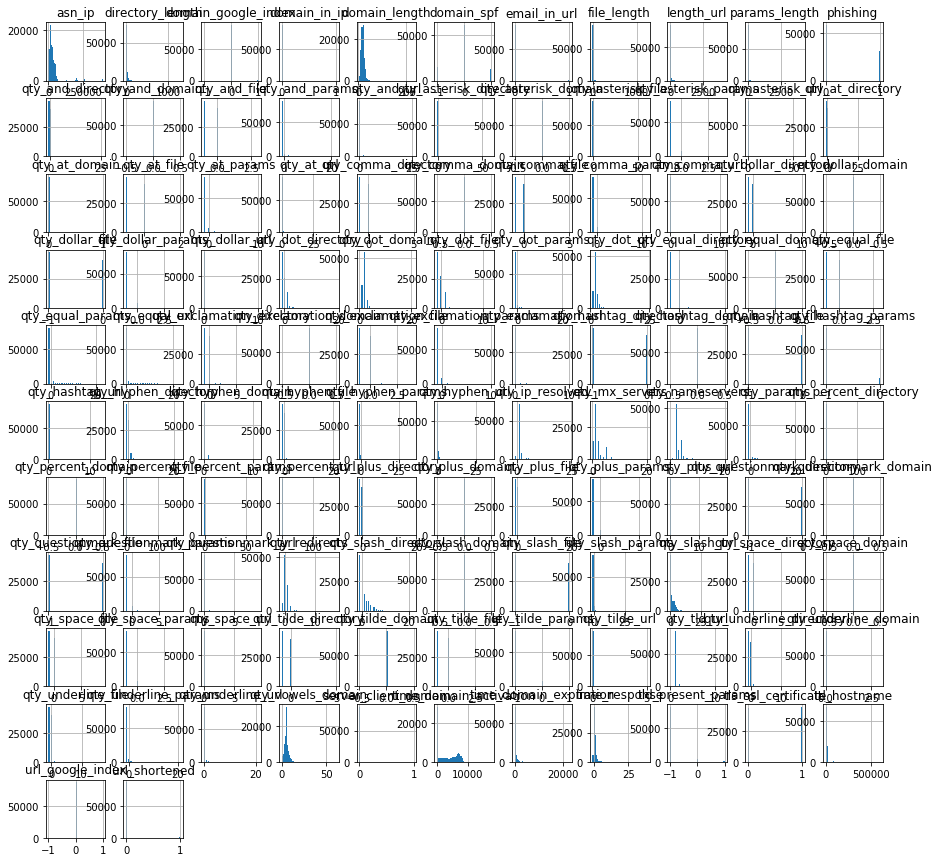

In [9]:
#Plotting the data distribution
data.hist(bins = 50,figsize = (15,15))
plt.show()

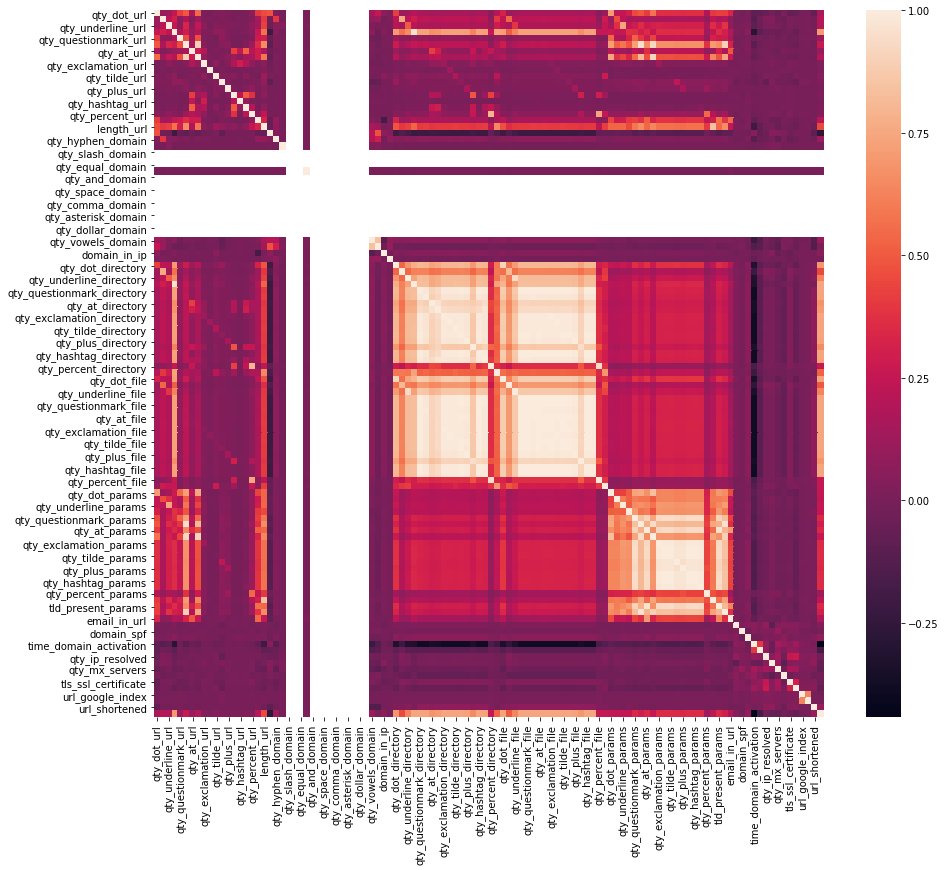

In [13]:
#Correlation heatmap

plt.figure(figsize=(15,13))
sns.heatmap(data.corr())
plt.show()

# Data Cleaning

In [7]:
#checking the data for null or missing values
data.isnull().sum()

qty_dot_url                0
qty_hyphen_url             0
qty_underline_url          0
qty_slash_url              0
qty_questionmark_url       0
qty_equal_url              0
qty_at_url                 0
qty_and_url                0
qty_exclamation_url        0
qty_space_url              0
qty_tilde_url              0
qty_comma_url              0
qty_plus_url               0
qty_asterisk_url           0
qty_hashtag_url            0
qty_dollar_url             0
qty_percent_url            0
qty_tld_url                0
length_url                 0
qty_dot_domain             0
qty_hyphen_domain          0
qty_underline_domain       0
qty_slash_domain           0
qty_questionmark_domain    0
qty_equal_domain           0
qty_at_domain              0
qty_and_domain             0
qty_exclamation_domain     0
qty_space_domain           0
qty_tilde_domain           0
                          ..
qty_at_params              0
qty_and_params             0
qty_exclamation_params     0
qty_space_para

# Outlier detection and removal

In [7]:
old_shape=data.shape

In [8]:
#detecting and removing outlier in ttl_hostname

Q1=np.percentile(data['ttl_hostname'],25,interpolation='midpoint')
Q3=np.percentile(data['ttl_hostname'],75,interpolation='midpoint')
IQR=Q3-Q1

In [9]:
Q1

292.0

In [10]:
Q3+1.5*IQR

26557.0

In [11]:
IQR

10506.0

In [12]:
upper=np.where(data.drop('phishing',axis=1) >= (Q3+1.5*IQR))

In [13]:
lower=np.where(data.drop('phishing',axis=1) <= (Q1-1.5*IQR))

In [14]:
data.drop(upper[0],inplace=True)

In [15]:
data.drop(lower[0],inplace=True)

In [16]:
new_shape=data.shape

print("Old shape : ",old_shape)
print("After Removing outlier ")
print("New shape : ",new_shape)

Old shape :  (88647, 112)
After Removing outlier 
New shape :  (55684, 112)


In [17]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,0,0,0,0,0
1,3,1,0,3,0,7,0,6,0,0,...,1,2,1,11174,0,0,0,0,0,1
2,1,0,0,1,0,0,0,0,0,0,...,2,2,1,285,1,1,0,0,0,1
3,3,0,0,0,0,0,0,0,0,0,...,1,2,2,14399,0,0,0,0,0,0
4,3,0,0,1,0,0,0,0,0,0,...,-1,6,0,-1,0,-1,0,0,0,0


# Splitting the Data

In [18]:
# Sepratating & assigning features and target columns to X & y
y = data['phishing']  #target column
X = data.drop('phishing',axis=1) #other than target
X.shape, y.shape

((55684, 111), (55684,))

In [19]:
# Splitting the dataset into train and test sets: 70-30 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

X_train.shape, X_test.shape

((38978, 111), (16706, 111))

# Machine Learning Models & Training

In [20]:
#importing packages
from sklearn.metrics import accuracy_score

In [21]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
    ML_Model.append(model)
    acc_train.append(round(a*100, 3))
    acc_test.append(round(b*100, 3))


# 1.Decision Tree Classifier

Decision trees are widely used models for classification and regression tasks. Essentially, they learn a hierarchy of if/else questions, leading to a decision. Learning a decision tree means learning the sequence of if/else questions that gets us to the true answer most quickly.

In the machine learning setting, these questions are called tests (not to be confused with the test set, which is the data we use to test to see how generalizable our model is). To build a tree, the algorithm searches over all possible tests and finds the one that is most informative about the target variable.

In [22]:
# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [23]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [24]:
#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.942
Decision Tree: Accuracy on test Data: 0.941


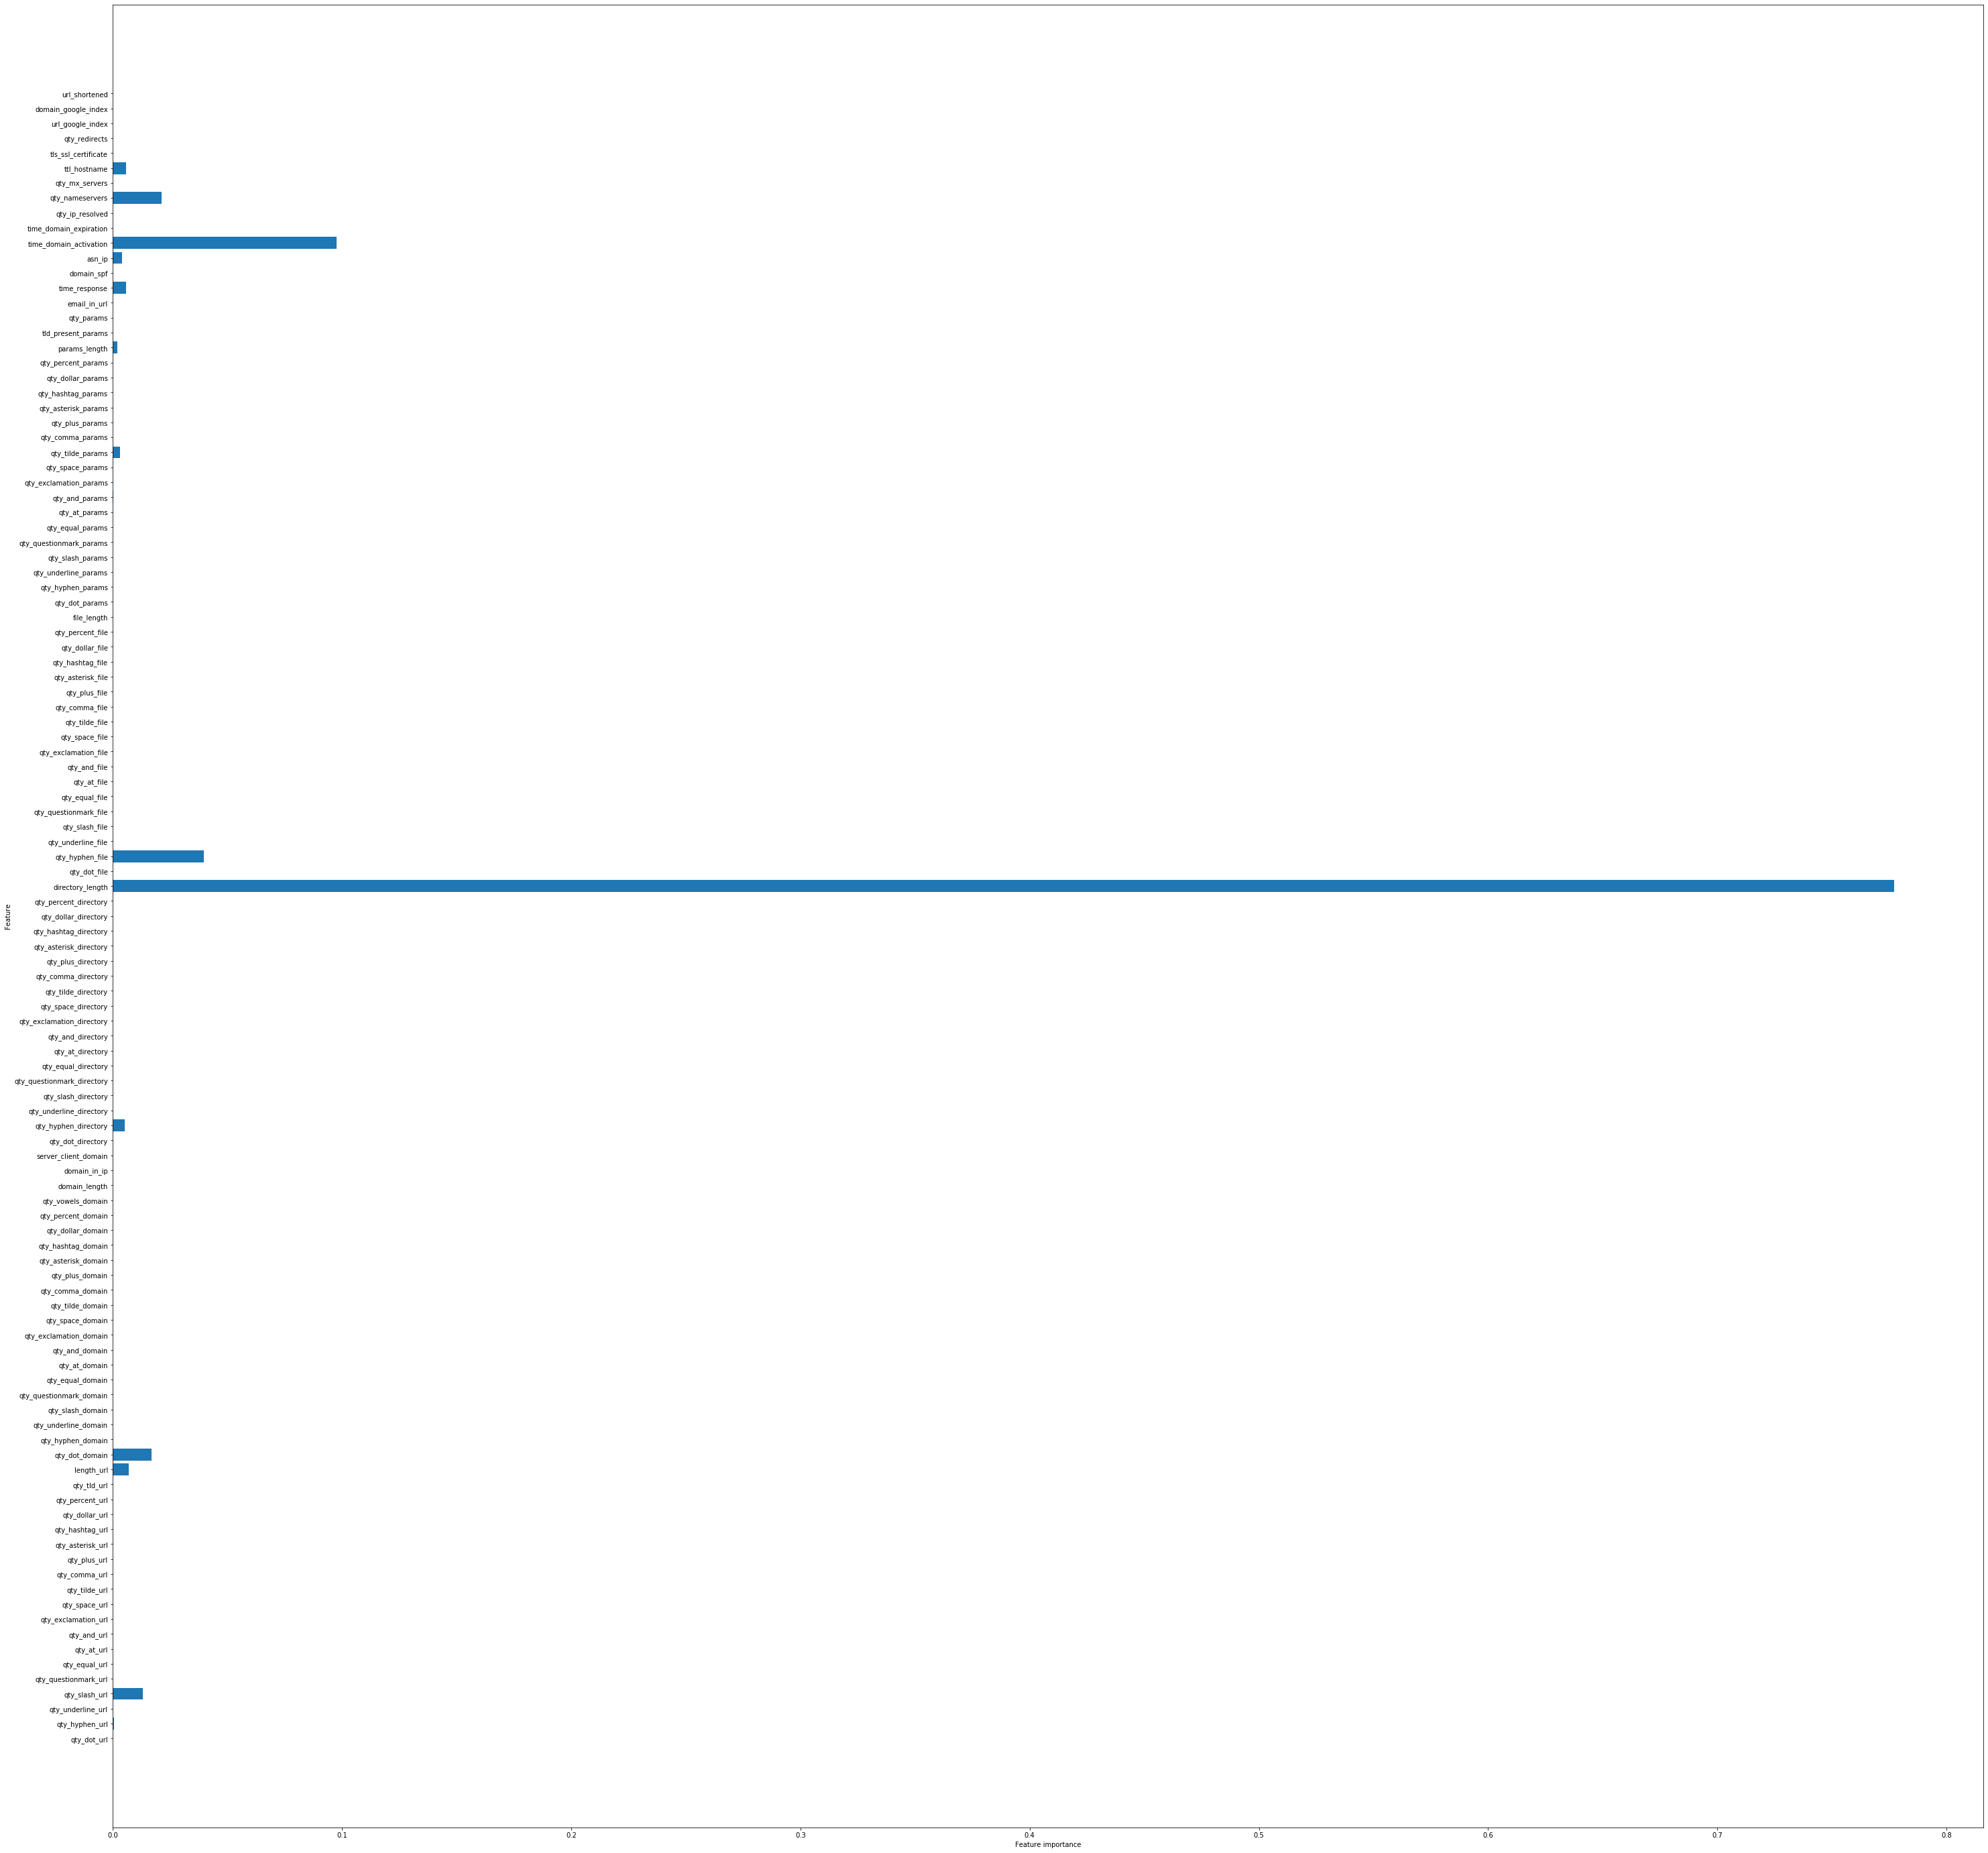

In [26]:
#checking the feature improtance in the model
plt.figure(figsize=(50,50))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


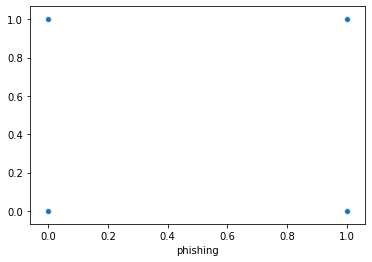

In [49]:
#y_test vs y_test_predict
print(sns.scatterplot(x=y_test,y=y_test_tree))

In [25]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

# 2. Random Forest Classifier

Random forests for regression and classification are currently among the most widely used machine learning methods.A random forest is essentially a collection of decision trees, where each tree is slightly different from the others. The idea behind random forests is that each tree might do a relatively good job of predicting, but will likely overfit on part of the data.

If we build many trees, all of which work well and overfit in different ways, we can reduce the amount of overfitting by averaging their results. To build a random forest model, you need to decide on the number of trees to build (the n_estimators parameter of RandomForestRegressor or RandomForestClassifier). They are very powerful, often work well without heavy tuning of the parameters, and don’t require scaling of the data.

In [26]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [27]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [28]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.924
Random forest: Accuracy on test Data: 0.924


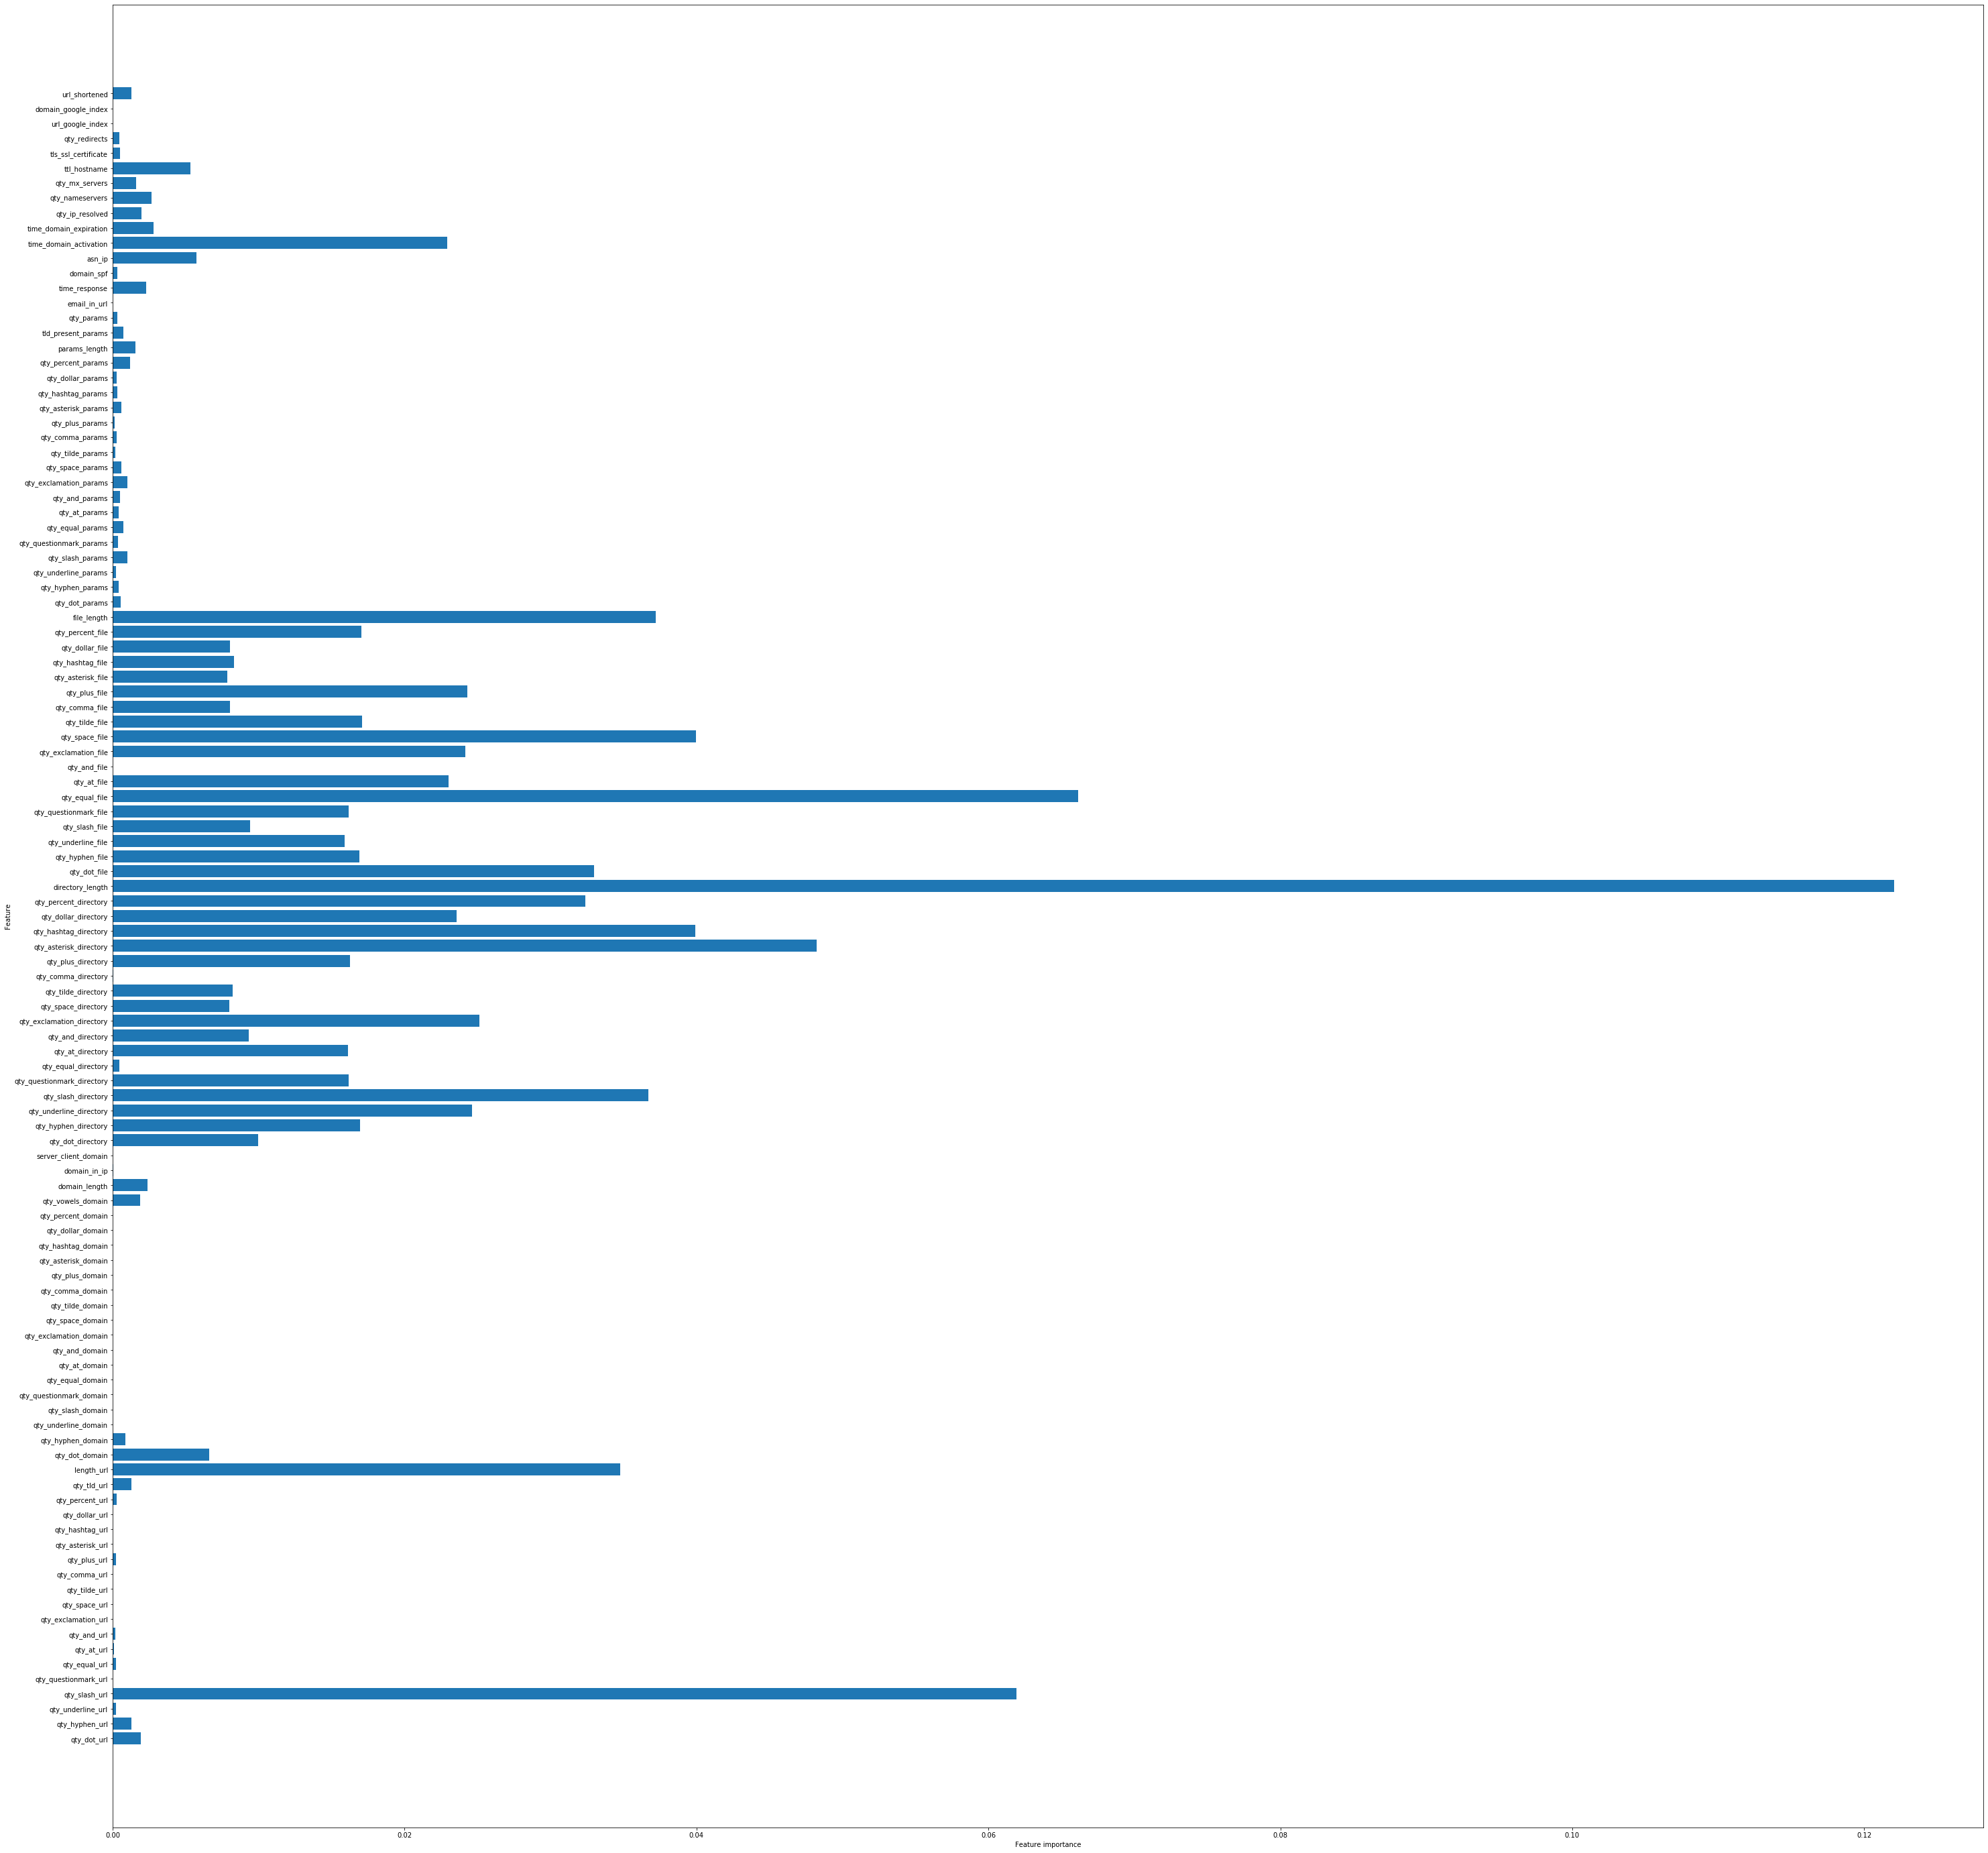

In [31]:
#checking the feature improtance in the model
plt.figure(figsize=(50,50))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

AxesSubplot(0.125,0.125;0.775x0.755)


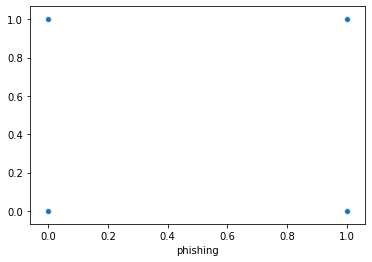

In [29]:
#y_test vs y_test_predict
print(sns.scatterplot(x=y_test,y=y_test_forest))

In [30]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

# 3. Multilayer Perceptrons (MLPs): Deep Learning

Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [31]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model 
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [32]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [33]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))


Multilayer Perceptrons: Accuracy on training Data: 0.936
Multilayer Perceptrons: Accuracy on test Data: 0.933


AxesSubplot(0.125,0.125;0.775x0.755)


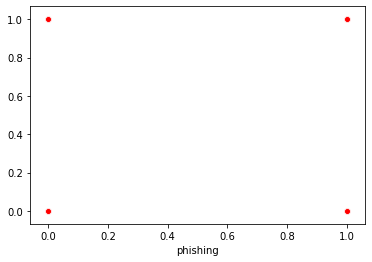

In [34]:
#y_test vs y_test_predict
print(sns.scatterplot(x=y_test,y=y_test_mlp,color="red"))

In [35]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Multilayer Perceptrons', acc_train_mlp, acc_test_mlp)

# 4. Naive Bayes

Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. It is mainly used in text classification that includes a high-dimensional training dataset.

In [36]:
#Naive_Bayers

from sklearn.naive_bayes import GaussianNB

#instantiate the model
NB = GaussianNB()

#fit the model
NB.fit(X_train, y_train)


GaussianNB()

In [37]:
#predicting the target value from the model for the samples
y_test_NB = NB.predict(X_test)
y_train_NB = NB.predict(X_train)

In [38]:
#computing the accuracy of the model performance
acc_train_NB = accuracy_score(y_train,y_train_NB)
acc_test_NB = accuracy_score(y_test,y_test_NB)

print("Gaussian Naive Bayes: Accuracy on training Data: {:.3f}".format(acc_train_NB))
print("Gaussian Naive Bayes: Accuracy on test Data: {:.3f}".format(acc_test_NB))


Gaussian Naive Bayes: Accuracy on training Data: 0.864
Gaussian Naive Bayes: Accuracy on test Data: 0.865


AxesSubplot(0.125,0.125;0.775x0.755)


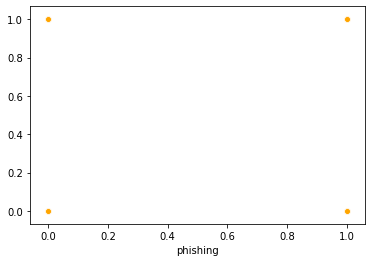

In [39]:
#y_test vs y_test_predict
print(sns.scatterplot(x=y_test,y=y_test_NB,color="orange"))

In [40]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Gaussian Naive Bayes', acc_train_NB, acc_test_NB)

# 5. Logistic Regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression).

In [41]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

# instantiate the model
regression=LogisticRegression()

#fit the model
regression.fit(X_train,y_train)

LogisticRegression()

In [42]:
#predicting the target value from the model for the samples
y_test_reg = regression.predict(X_test)
y_train_reg = regression.predict(X_train)

In [43]:
#computing the accuracy of the model performance
acc_train_reg = accuracy_score(y_train,y_train_reg)
acc_test_reg = accuracy_score(y_test,y_test_reg)

print("Logistic Regression: Accuracy on training Data: {:.3f}".format(acc_train_reg))
print("Logistic Regression : Accuracy on test Data: {:.3f}".format(acc_test_reg))

Logistic Regression: Accuracy on training Data: 0.916
Logistic Regression : Accuracy on test Data: 0.915


In [44]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Logistic Regression', acc_train_reg, acc_test_reg)

AxesSubplot(0.125,0.125;0.775x0.755)


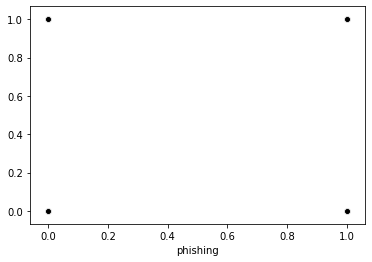

In [45]:
print(sns.scatterplot(x=y_test,y=y_test_reg,color="black"))

# Comparision of Models

To compare the models performance, a dataframe is created. The columns of this dataframe are the lists created to store the results of the model.

In [46]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results 

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,94.233,94.146
1,Random Forest,92.365,92.422
2,Multilayer Perceptrons,93.550,93.266
3,Gaussian Naive Bayes,86.385,86.478
4,Logistic Regression,91.567,91.536


In [47]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,94.233,94.146
2,Multilayer Perceptrons,93.550,93.266
1,Random Forest,92.365,92.422
4,Logistic Regression,91.567,91.536
3,Gaussian Naive Bayes,86.385,86.478


# CONCLUSION

# By anaylizing different machine learning model and their accuracy we conclude that Decision tree is the best fit algorithm for classification of this project. 
# With help of decision tree algorithm we predicted whether the site phishing or not.